## Домашнее задание по теме «Временные ряды, общая теория»

#### 1. Скачайте материалы к занятию.
#### 2. Проанализируйте ряды и сделайте их стационарными.
#### 3. Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [95]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [96]:
sales_of_company_x = pd.read_csv('https://raw.githubusercontent.com/Viktor-89/X_Project/main/Series/monthly-sales-of-company-x-jan-6.csv', delimiter=',')
robberies_in_boston = pd.read_csv('https://raw.githubusercontent.com/Viktor-89/X_Project/main/Series/monthly-boston-armed-robberies-j.csv', delimiter=',')
airlines_passengers = pd.read_csv('https://raw.githubusercontent.com/Viktor-89/X_Project/main/Series/international-airline-passengers.csv', delimiter=',')
mean_monthly_temp = pd.read_csv('https://raw.githubusercontent.com/Viktor-89/X_Project/main/Series/mean-monthly-air-temperature-deg.csv', delimiter=',')
dowjones_closing = pd.read_csv('https://raw.githubusercontent.com/Viktor-89/X_Project/main/Series/weekly-closings-of-the-dowjones-.csv', delimiter=',')
female_births = pd.read_csv('https://raw.githubusercontent.com/Viktor-89/X_Project/main/Series/daily-total-female-births-in-cal.csv', delimiter=',')

In [97]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [98]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [99]:
series_1 = sales_of_company_x['Count']
series_2 = robberies_in_boston['Count']
series_3 = airlines_passengers['Count']
series_4 = mean_monthly_temp['Deg']
series_5 = dowjones_closing['Close']
series_6 = female_births['Count']

### ***1. Ежемесячные продажи компании***

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


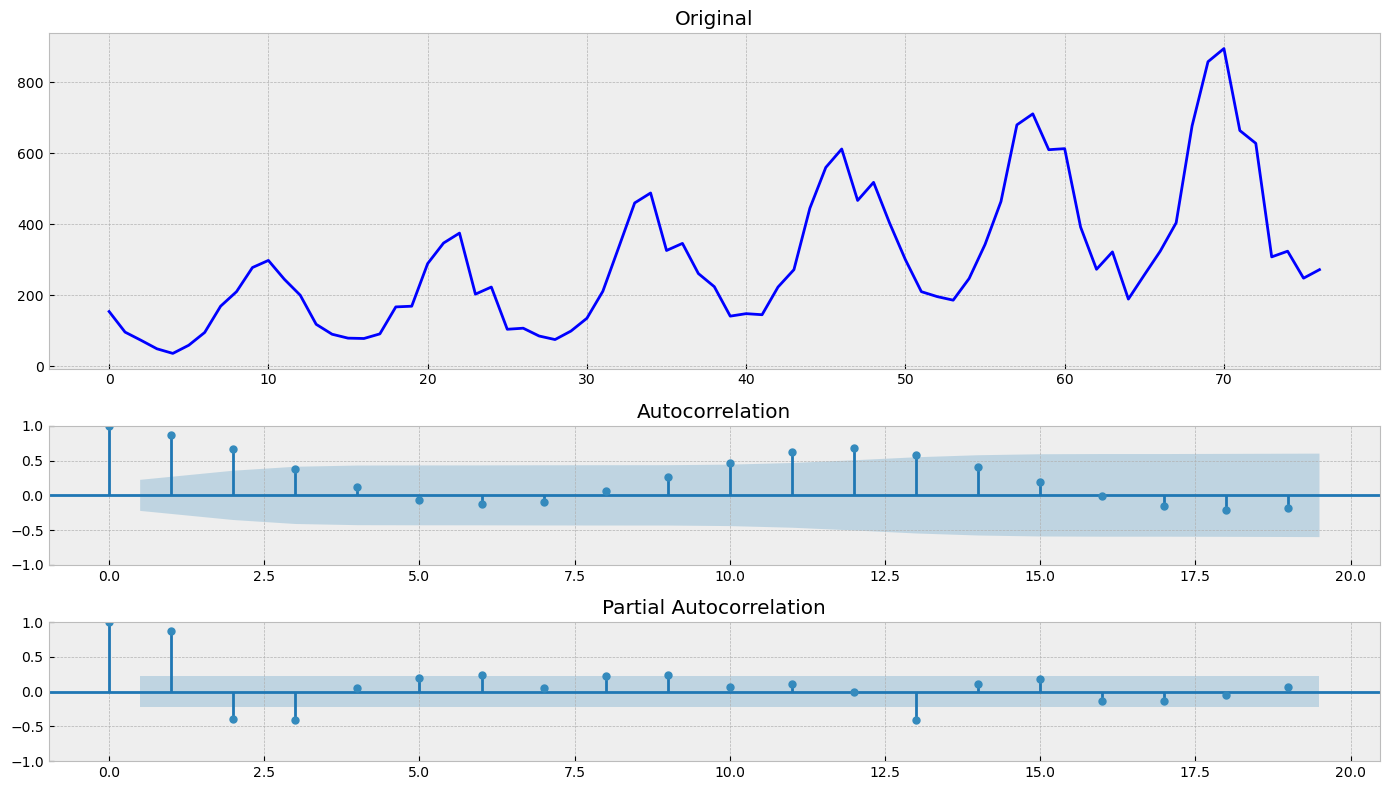

In [112]:
tsplot(series_1)

***График нестационарный. Уберем изменение дисперсии, наличие тренда, сезонность.***

Results of Dickey-Fuller Test:
Test Statistic                 -3.125024
p-value                         0.024756
#Lags Used                     11.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


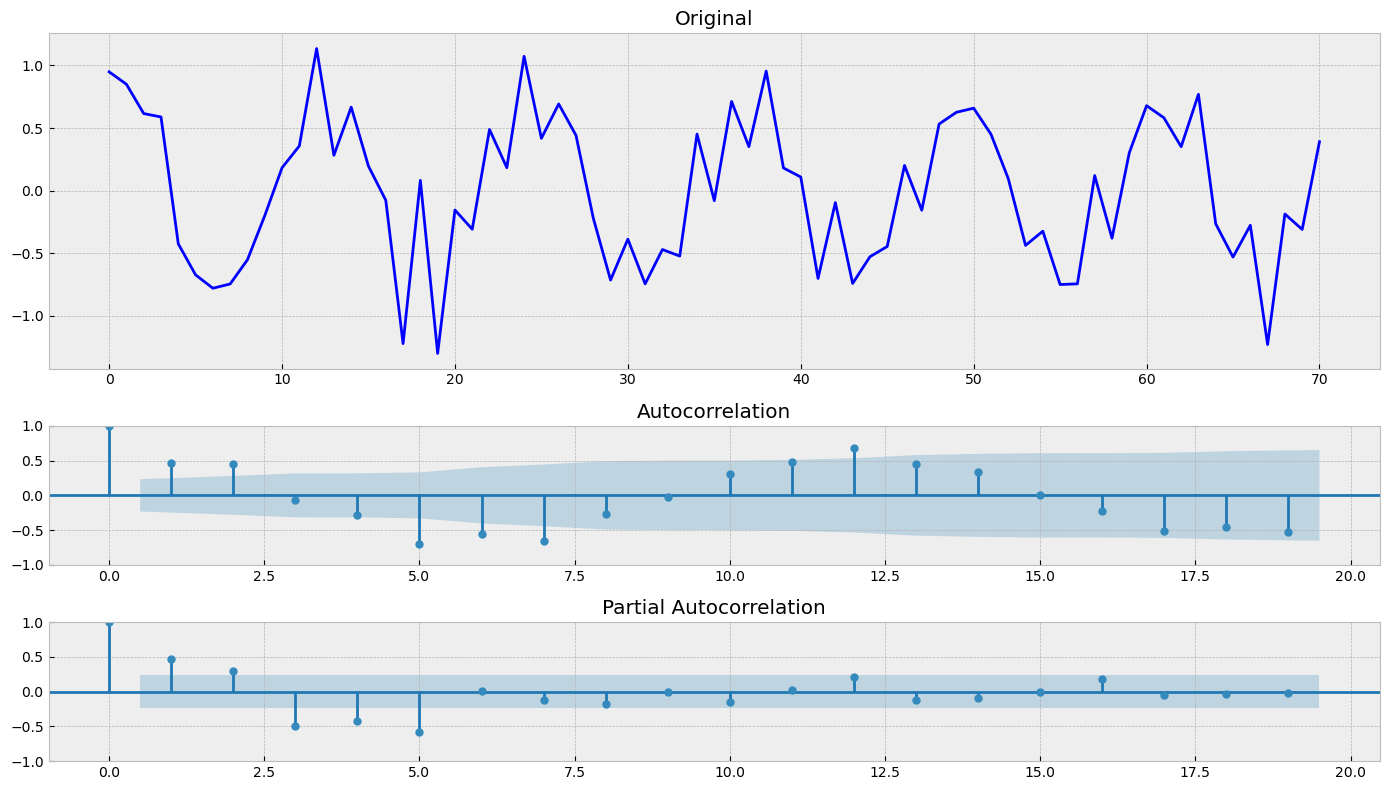

In [117]:
series_1_b = boxcox(series_1, 0)
series_1_bd = series_1_b[1:] - series_1_b[:-1]
series_x = series_1_bd[5:] - series_1_bd[:-5]
tsplot(series_x)

***p-value < 0.05, считаем, что ряд стационарный.***

### ***2. Ежемесячные вооруженные ограбления в Бостоне***

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


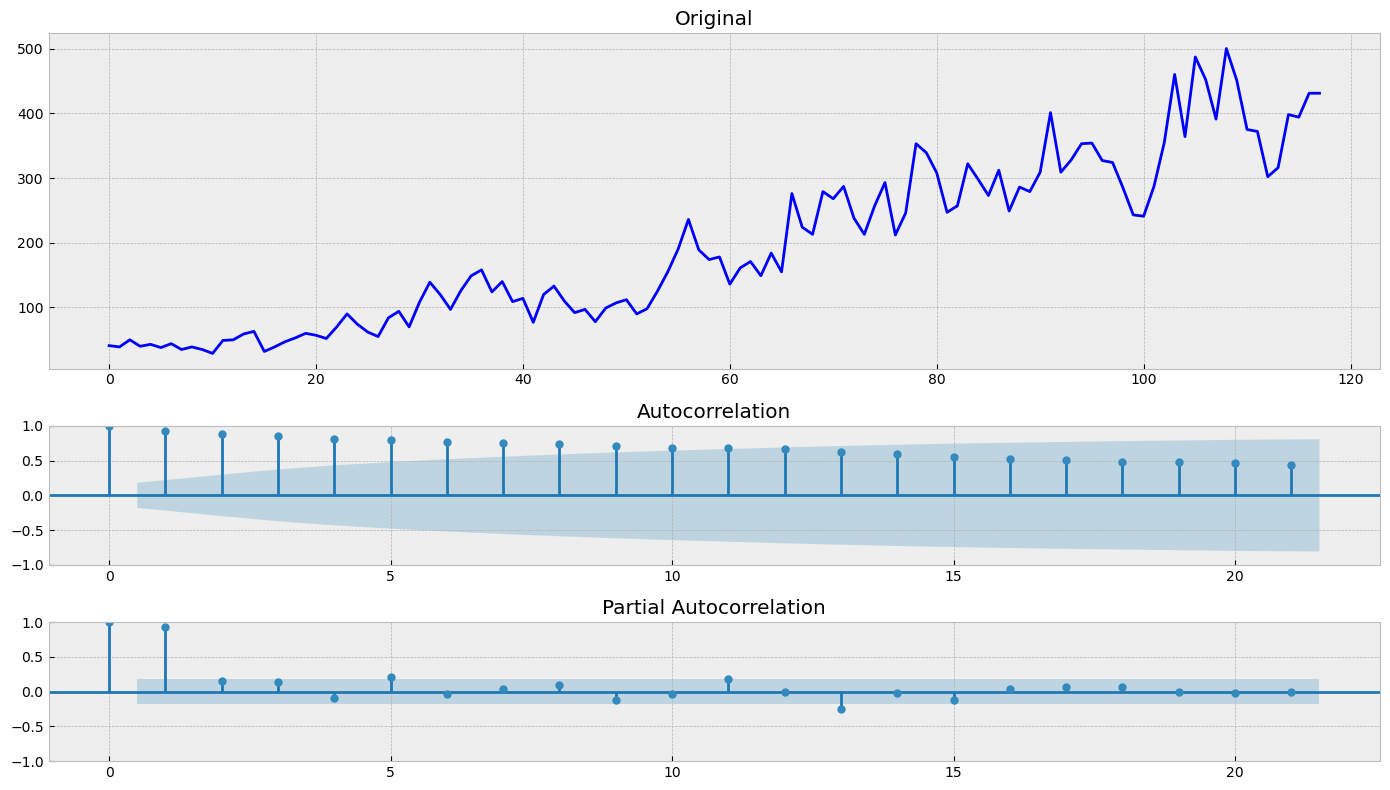

In [102]:
tsplot(series_2)

***График нестационарный. Уберем изменение дисперсии, наличие тренда, сезонность.***

Results of Dickey-Fuller Test:
Test Statistic                 -4.232984
p-value                         0.000579
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


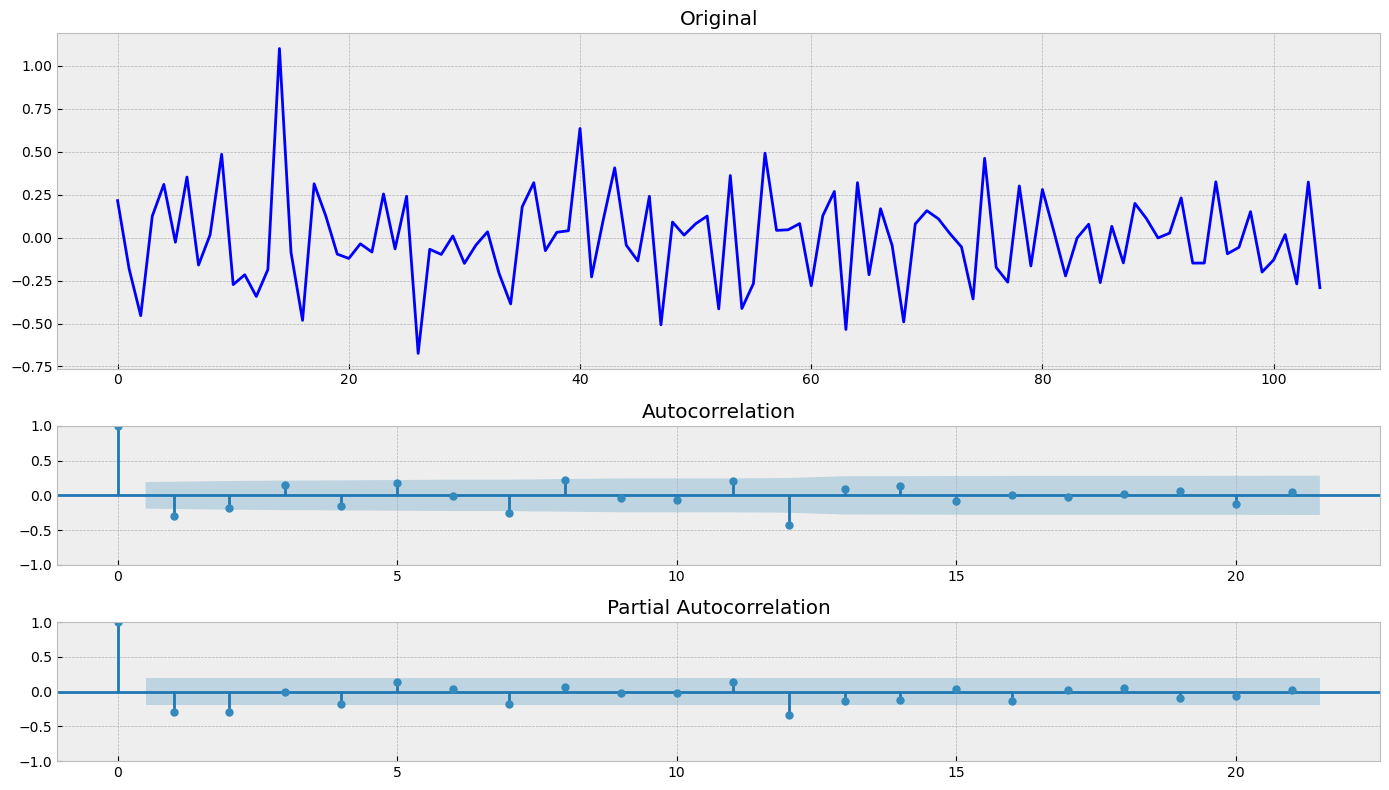

In [103]:
series_2_b = boxcox(series_2, 0)
series_2_bd = series_2_b[1:] - series_2_b[:-1]
series_y = series_2_bd[12:] - series_2_bd[:-12]
tsplot(series_y)

***p-value < 0.05, считаем, что ряд стационарный.***

### ***3. Пассажиры международной авиакомпании***

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


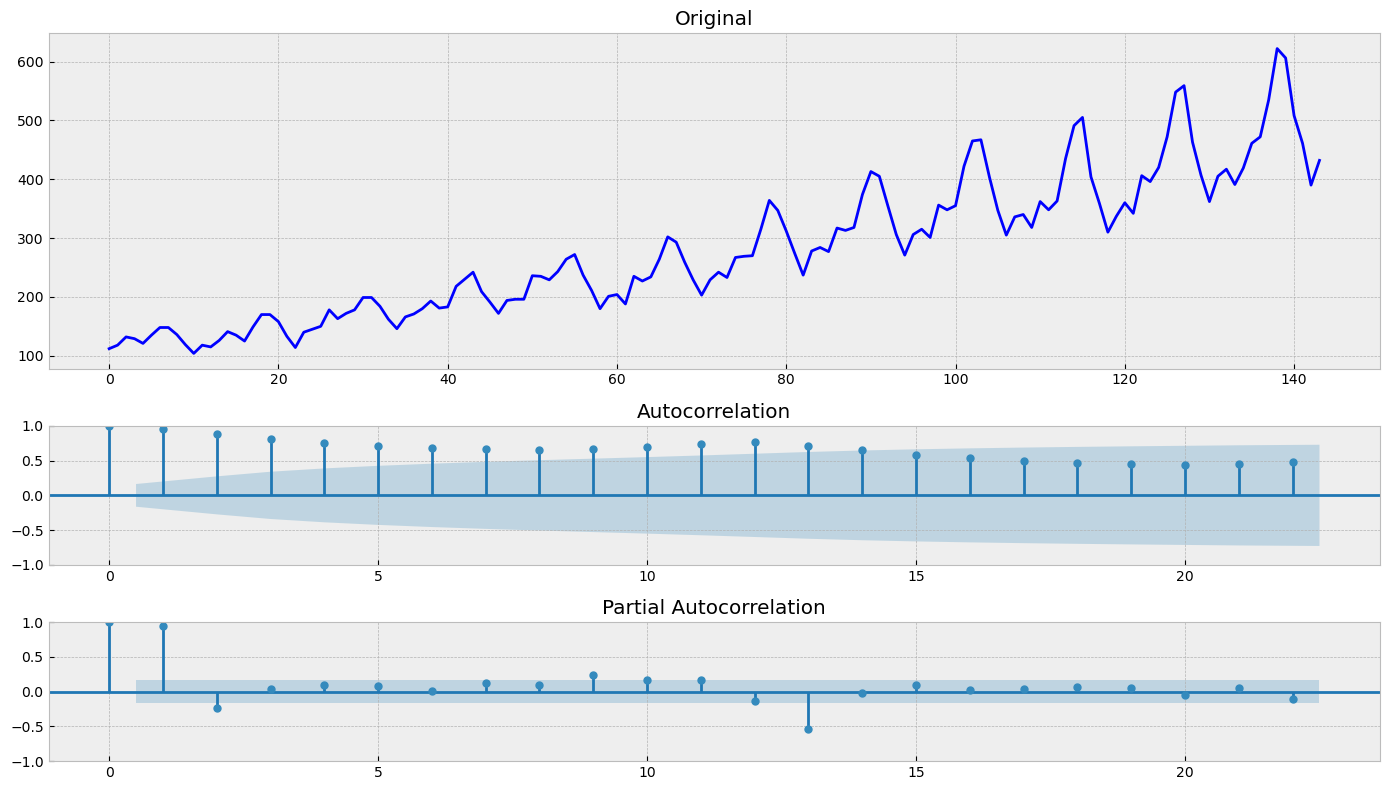

In [104]:
tsplot(series_3)

***График нестационарный. Уберем изменение дисперсии, наличие тренда, сезонность.***

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


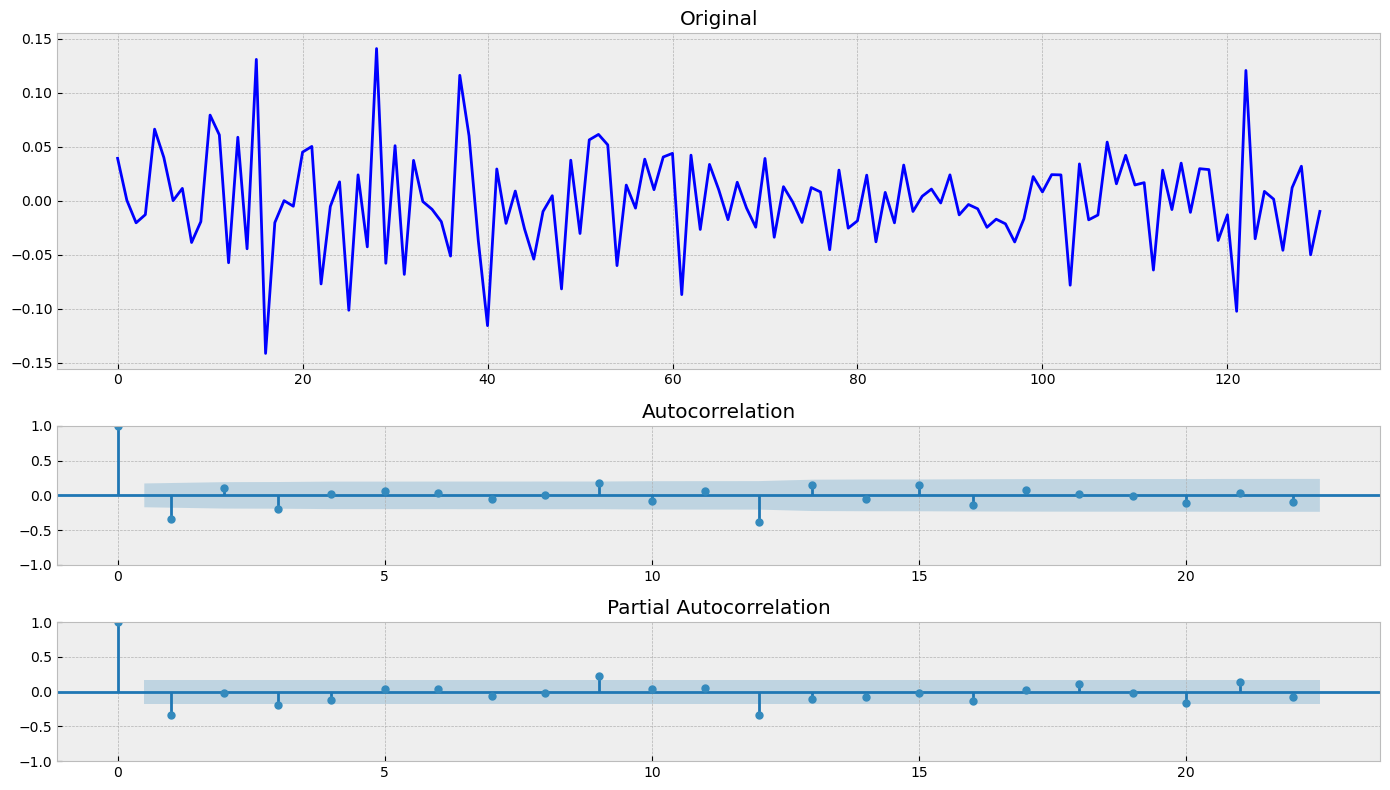

In [105]:
series_3_b = boxcox(series_3, 0)
series_3_bd = series_3_b[1:] - series_3_b[:-1]
series_z = series_3_bd[12:] - series_3_bd[:-12]
tsplot(series_z)

***p-value < 0.05, считаем, что ряд стационарный.***

### ***4. Cреднемесячная температура воздуха***

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


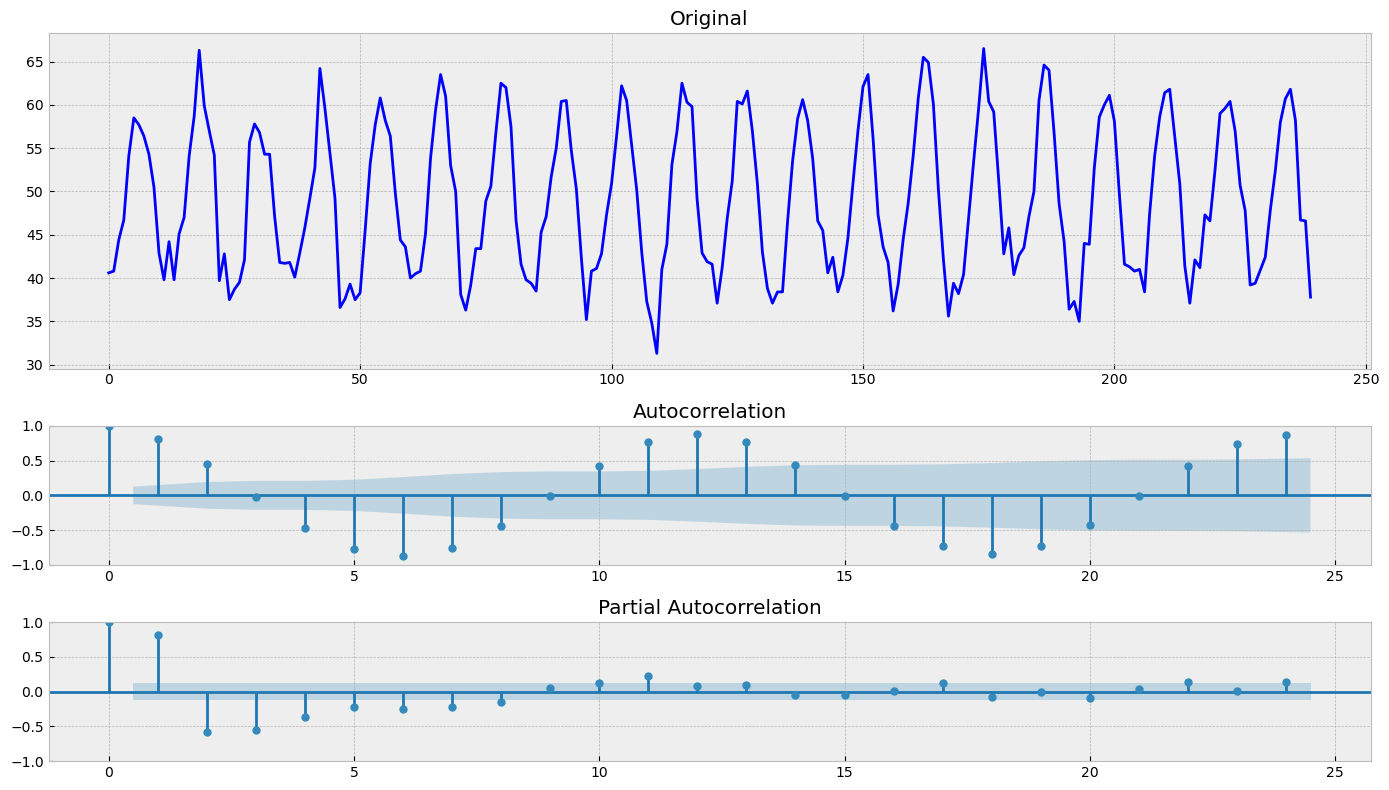

In [106]:
tsplot(series_4)

***График стационарный. Подтвердим, уберем изменение дисперсии.***

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


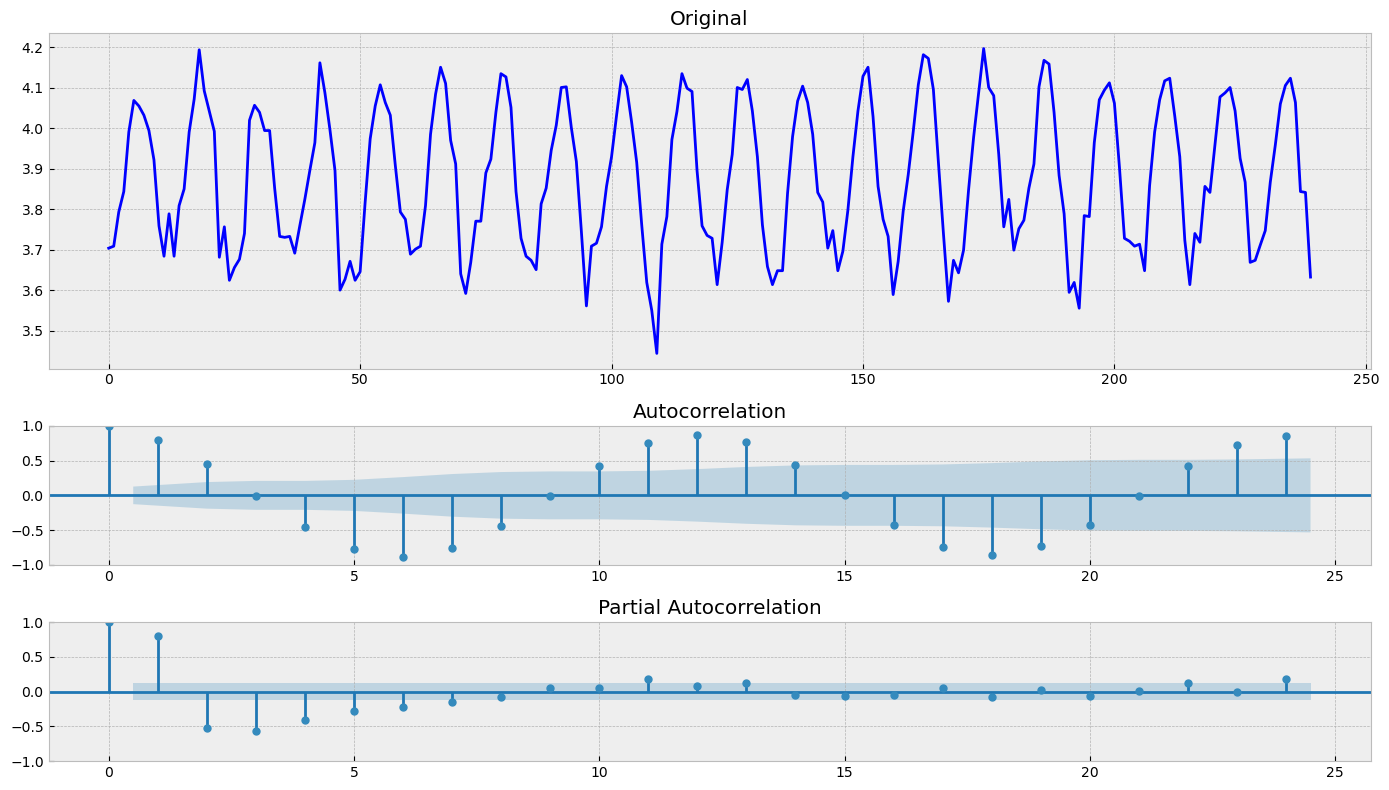

In [107]:
series_4_b = boxcox(series_4, 0)
tsplot(series_4_b)

***p-value < 0.05, считаем, что ряд стационарный.***

### ***5. Eженедельные закрытия dowjones***

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


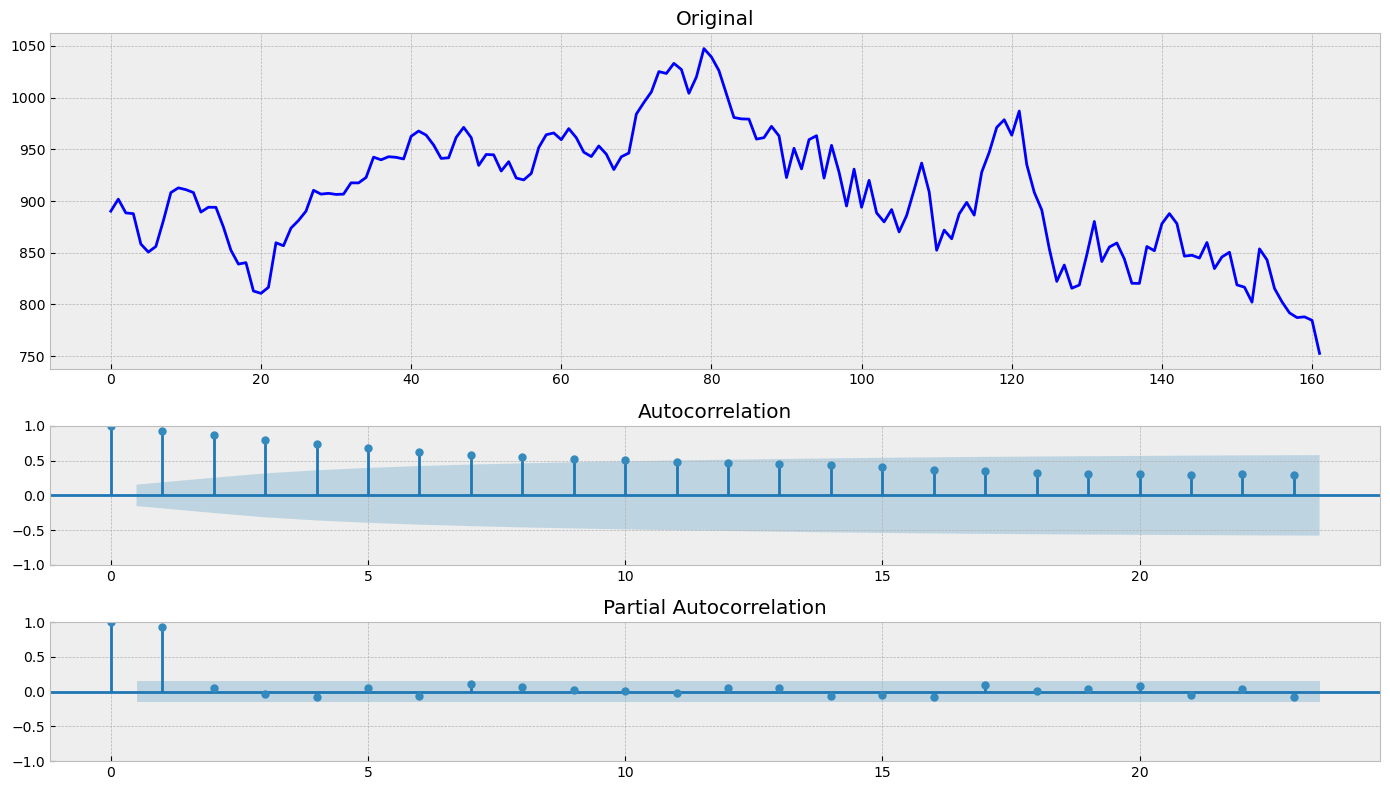

In [108]:
tsplot(series_5)

***График нестационарный. Уберем изменение дисперсии, наличие тренда, сезонность.***

Results of Dickey-Fuller Test:
Test Statistic                  -3.433413
p-value                          0.009871
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


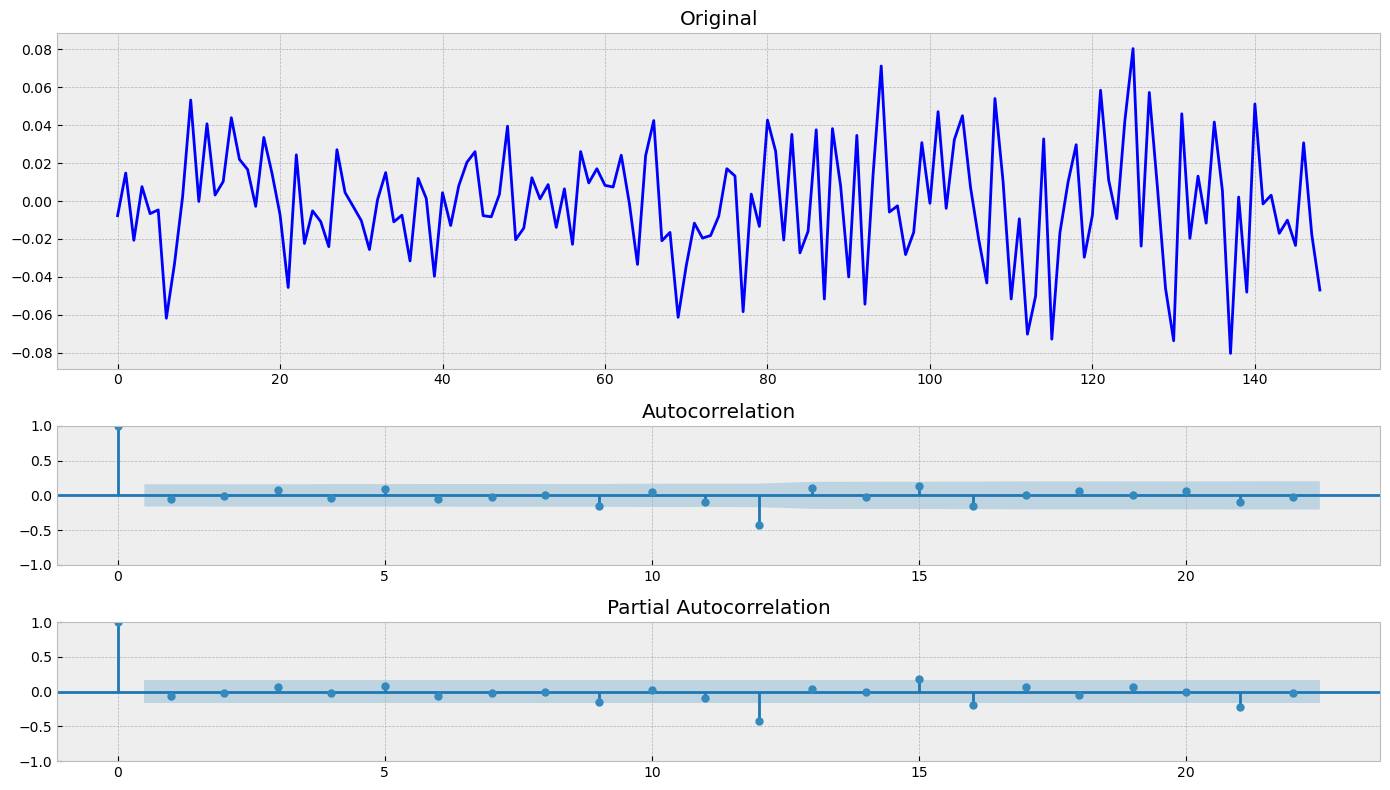

In [109]:
series_5_b = boxcox(series_5, 0)
series_5_bd = series_5_b[1:] - series_5_b[:-1]
series_t = series_5_bd[12:] - series_5_bd[:-12]
tsplot(series_t)

***p-value < 0.05, считаем, что ряд стационарный.***

### ***6. Ежедневное общее число рождений женщин***

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


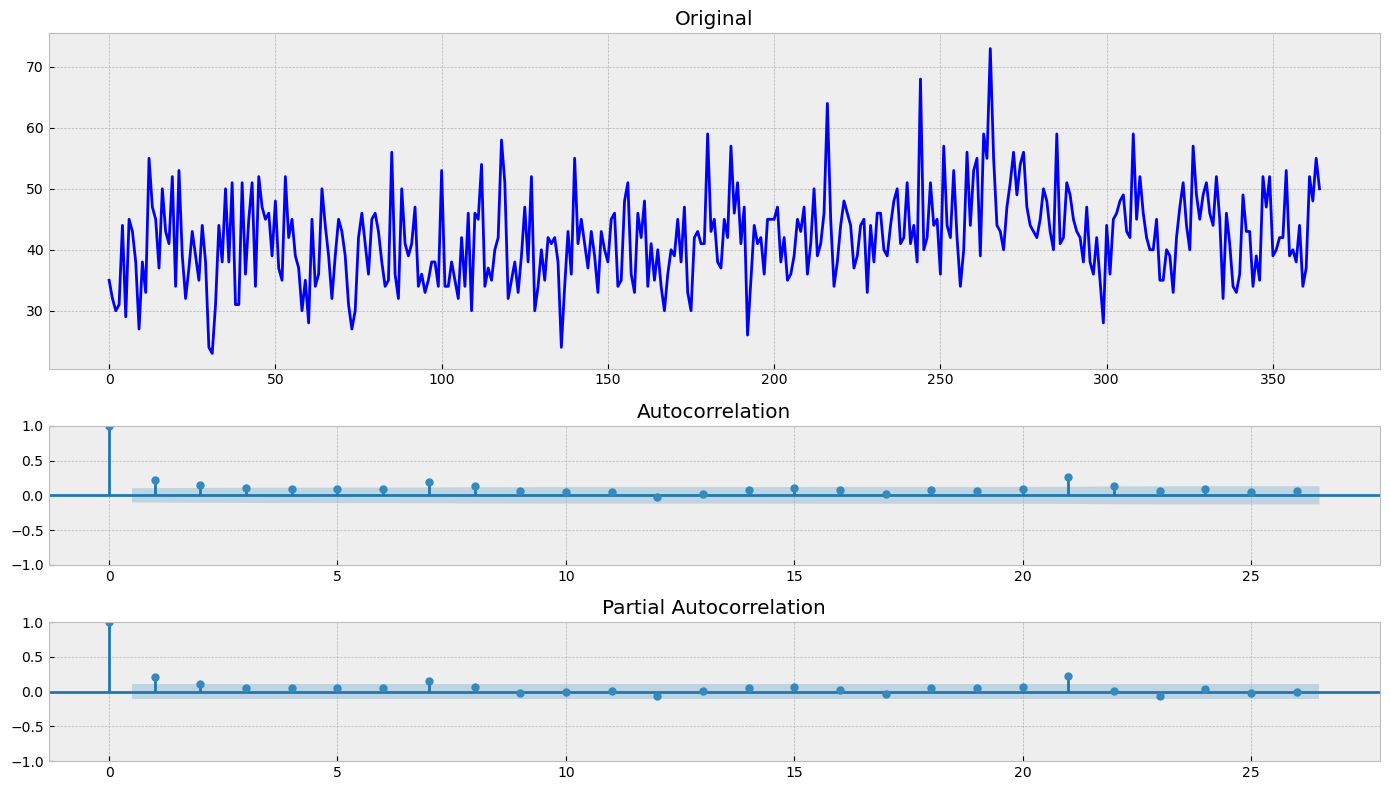

In [110]:
tsplot(series_6)

***График стационарный. Подтвердим, уберем изменение дисперсии.***

Results of Dickey-Fuller Test:
Test Statistic                  -4.353173
p-value                          0.000359
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


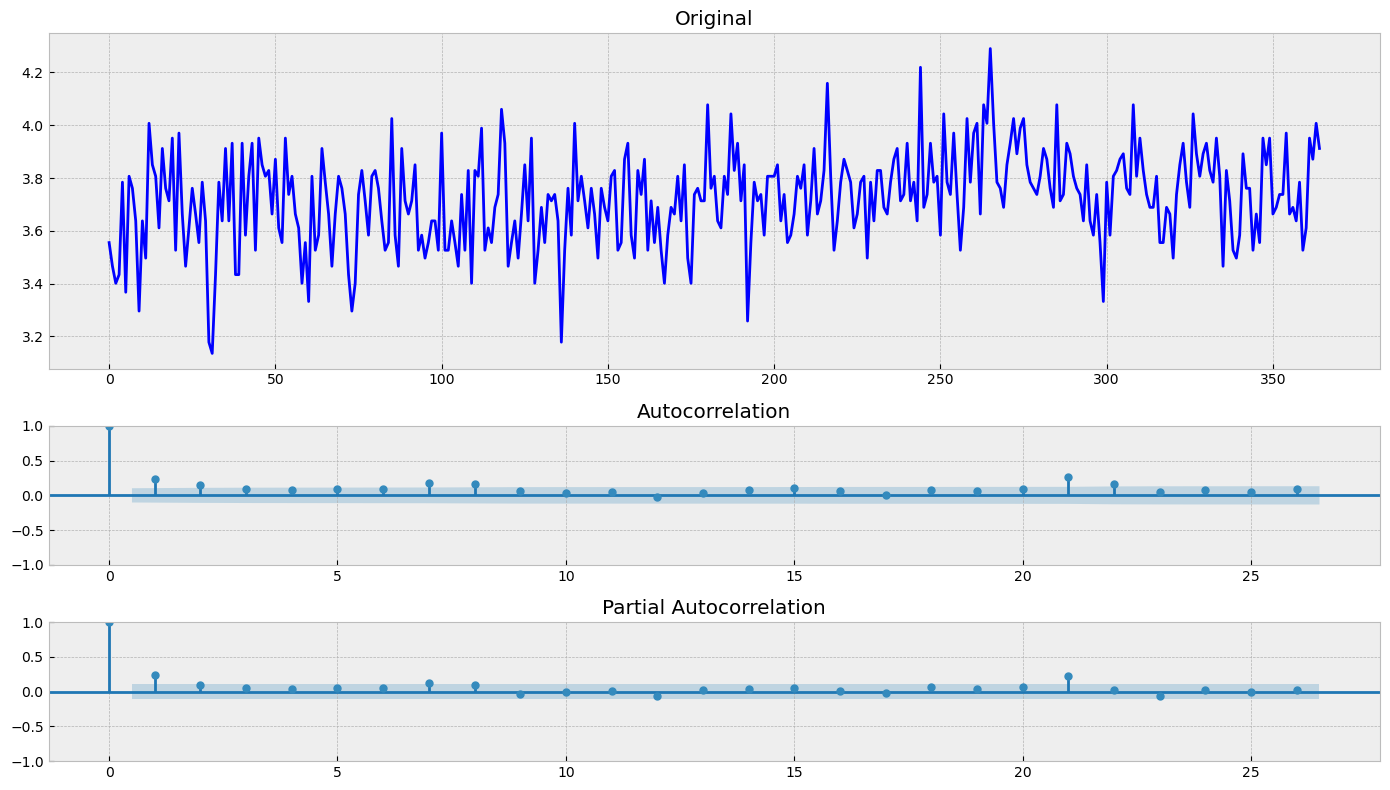

In [111]:
series_6_b = boxcox(series_6, 0)
tsplot(series_6_b)

***p-value < 0.05, считаем, что ряд стационарный.***